In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
import heapq
from collections import defaultdict
from google.colab import files

In [2]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Uploaded Image: {image_path}")

Saving pic.jpg to pic.jpg
Uploaded Image: pic.jpg


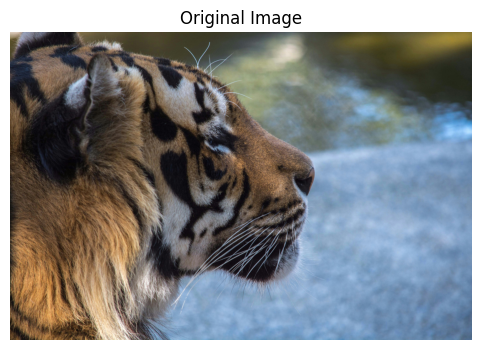

In [3]:
def show_image(title, img_data, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(img_data, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

original_image = Image.open(image_path)
show_image("Original Image", original_image)

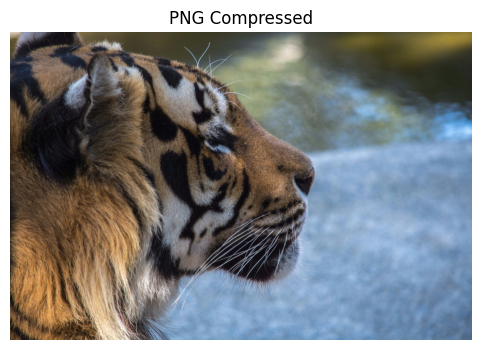

In [4]:
png_buffer = io.BytesIO()
original_image.save(png_buffer, format="PNG", optimize=True)

png_compressed = Image.open(png_buffer)
show_image("PNG Compressed", png_compressed)

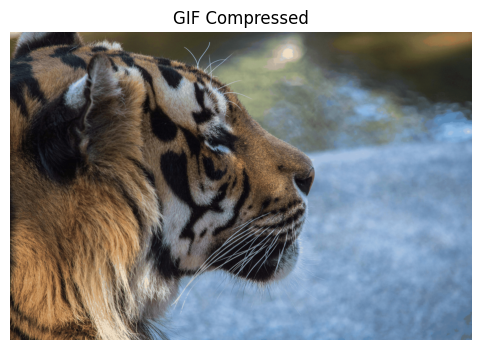

In [5]:
gif_buffer = io.BytesIO()
original_image.convert("P", palette=Image.ADAPTIVE, colors=256).save(gif_buffer, format="GIF", optimize=True)

gif_compressed = Image.open(gif_buffer)
show_image("GIF Compressed", gif_compressed)

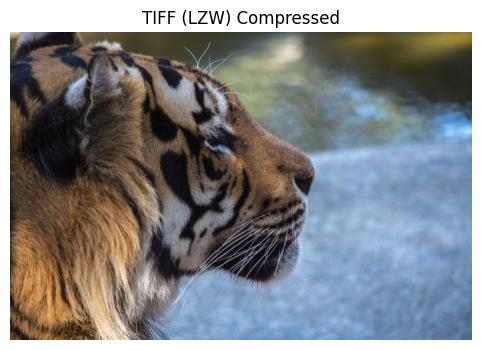

In [6]:
tiff_buffer = io.BytesIO()
original_image.save(tiff_buffer, format="TIFF", compression="tiff_lzw")

tiff_compressed = Image.open(tiff_buffer)
show_image("TIFF (LZW) Compressed", tiff_compressed)

RLE Compressed Data (Snippet): [(210, 8), (211, 1), (210, 1), (208, 1), (207, 2), (208, 1), (210, 1), (211, 1), (212, 2), (211, 2), (210, 2), (209, 10), (205, 1), (207, 1), (209, 1), (211, 2), (210, 1), (209, 1), (208, 1), (205, 1)]


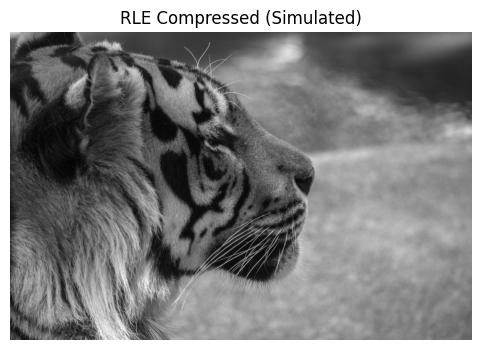

In [7]:
def rle_encode(img_array):
    pixels = img_array.flatten()
    encoded_pixels = []
    prev_pixel = pixels[0]
    count = 1

    for pixel in pixels[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoded_pixels.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoded_pixels.append((prev_pixel, count))
    return encoded_pixels

gray_image = original_image.convert("L")
gray_array = np.array(gray_image)

rle_compressed = rle_encode(gray_array)
print("RLE Compressed Data (Snippet):", rle_compressed[:20])
show_image("RLE Compressed (Simulated)", gray_array, cmap="gray")

Huffman Encoded Data (Snippet): 1100110011111100110011111100110011111100110011111100110011111100110011111100110011111100110011111100


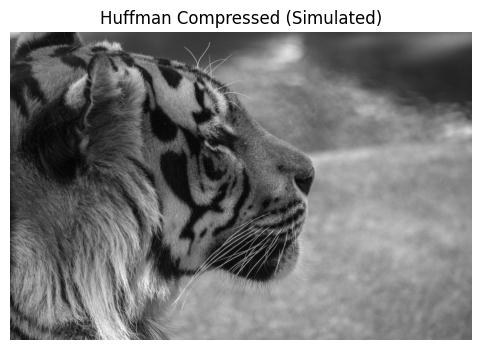

In [8]:
class HuffmanNode:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

def generate_huffman_codes(node, prefix="", code_dict={}):
    if node is not None:
        if node.symbol is not None:
            code_dict[node.symbol] = prefix
        generate_huffman_codes(node.left, prefix + "0", code_dict)
        generate_huffman_codes(node.right, prefix + "1", code_dict)
    return code_dict

gray_pixels = gray_array.flatten()
pixel_frequencies = defaultdict(int)
for pixel in gray_pixels:
    pixel_frequencies[pixel] += 1

huffman_root = build_huffman_tree(pixel_frequencies)
huffman_codes = generate_huffman_codes(huffman_root)

huffman_encoded_data = "".join(huffman_codes[pixel] for pixel in gray_pixels)
print("Huffman Encoded Data (Snippet):", huffman_encoded_data[:100])

show_image("Huffman Compressed (Simulated)", gray_array, cmap="gray")

LZW Compressed Data (Snippet): [210, 256, 257, 256, 211, 210, 208, 207, 207, 208, 210, 211, 212, 212, 211, 260, 210, 209, 273, 274]


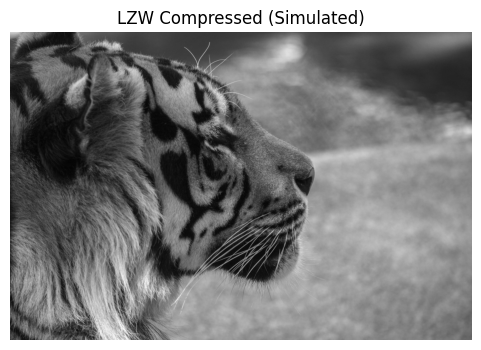

In [9]:
def lzw_compress(data):
    dictionary = {chr(i): i for i in range(256)}
    current_code = 256
    w = ""
    compressed_data = []

    for char in data:
        wc = w + char
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = current_code
            current_code += 1
            w = char

    if w:
        compressed_data.append(dictionary[w])

    return compressed_data

image_string = "".join(chr(pixel) for pixel in gray_array.flatten())
lzw_compressed = lzw_compress(image_string)
print("LZW Compressed Data (Snippet):", lzw_compressed[:20])

show_image("LZW Compressed (Simulated)", gray_array, cmap="gray")

In [10]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
from sklearn.decomposition import PCA
from google.colab import files

In [11]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"Uploaded Image: {image_path}")

Saving pic.jpg to pic (1).jpg
Uploaded Image: pic (1).jpg


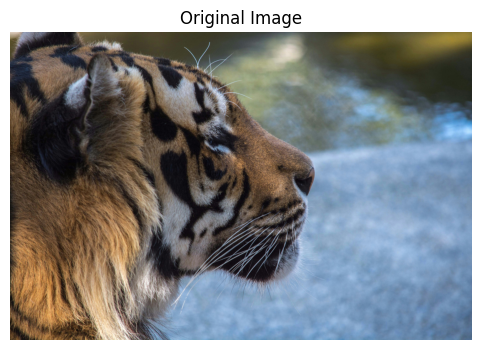

In [12]:
def show_image(title, img_data, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.imshow(img_data, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

original_image = Image.open(image_path)
show_image("Original Image", original_image)

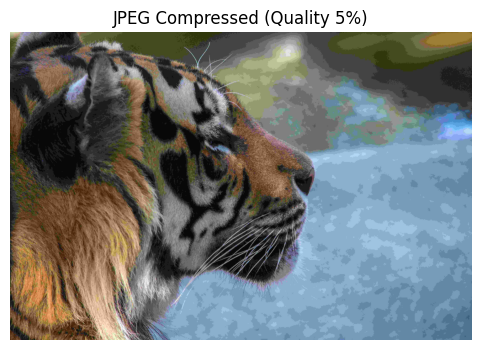

In [13]:
jpeg_buffer = io.BytesIO()
original_image = original_image.convert("RGB")
original_image.save(jpeg_buffer, format="JPEG", quality=5)

jpeg_compressed = Image.open(jpeg_buffer)
show_image("JPEG Compressed (Quality 5%)", jpeg_compressed)

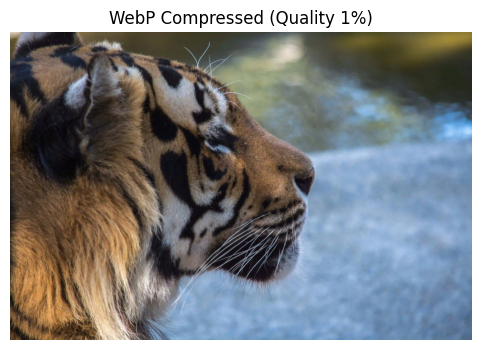

In [14]:
webp_buffer = io.BytesIO()
original_image.save(webp_buffer, format="WEBP", quality=1)

webp_compressed = Image.open(webp_buffer)
show_image("WebP Compressed (Quality 1%)", webp_compressed)

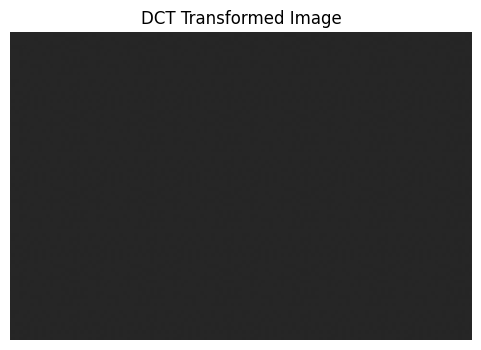

In [15]:
def apply_dct(img):
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img_float = np.float32(img_gray) / 255.0
    dct_transformed = cv2.dct(img_float)
    return dct_transformed

dct_image = apply_dct(original_image)
show_image("DCT Transformed Image", dct_image, cmap="gray")

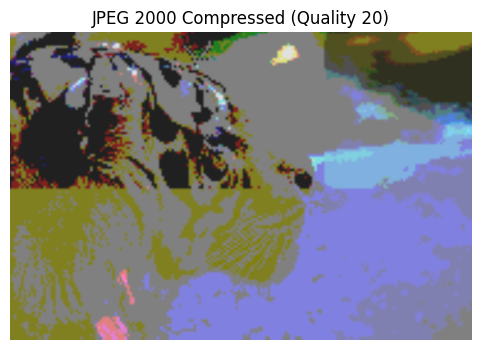

In [16]:
jpeg2000_buffer = io.BytesIO()
original_image.save(jpeg2000_buffer, format="JPEG2000", quality_mode="dB", quality_layers=[20])

jpeg2000_compressed = Image.open(jpeg2000_buffer)
show_image("JPEG 2000 Compressed (Quality 20)", jpeg2000_compressed)

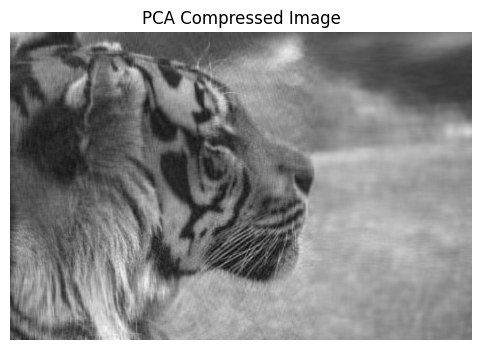

In [17]:
def apply_pca(img, num_components=50):
    img_gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img_flat = img_gray.reshape(-1, img_gray.shape[1])

    pca = PCA(n_components=num_components)
    transformed = pca.fit_transform(img_flat)
    restored = pca.inverse_transform(transformed)

    return restored.reshape(img_gray.shape)

pca_compressed = apply_pca(original_image, num_components=50)
show_image("PCA Compressed Image", pca_compressed, cmap="gray")

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [22]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    x_train, y_train_cat, y_train, test_size=0.2, random_state=42
)

In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_val, y_val_cat))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.9029 - loss: 0.3273 - val_accuracy: 0.9818 - val_loss: 0.0597
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9827 - val_loss: 0.0552
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9891 - val_loss: 0.0341
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9889 - val_loss: 0.0385
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9892 - val_loss: 0.0381
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9970 - loss: 0.0101 - val_accuracy: 0.9886 - val_loss: 0.0474
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9954 - loss: 0.0130 - val_accuracy: 0.9903 - val_loss: 0.0360
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.9975 -

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9856 - loss: 0.0565
Test Accuracy: 0.9887


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9856 - loss: 0.0565
Test Loss: 0.0425
Test Accuracy: 0.9887


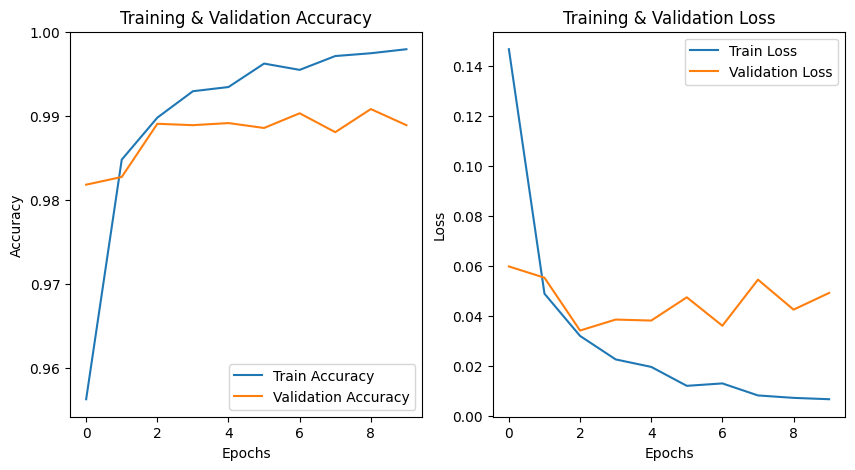

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [29]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [30]:
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")

Precision: 0.9888
Recall: 0.9887
F1-Score: 0.9887


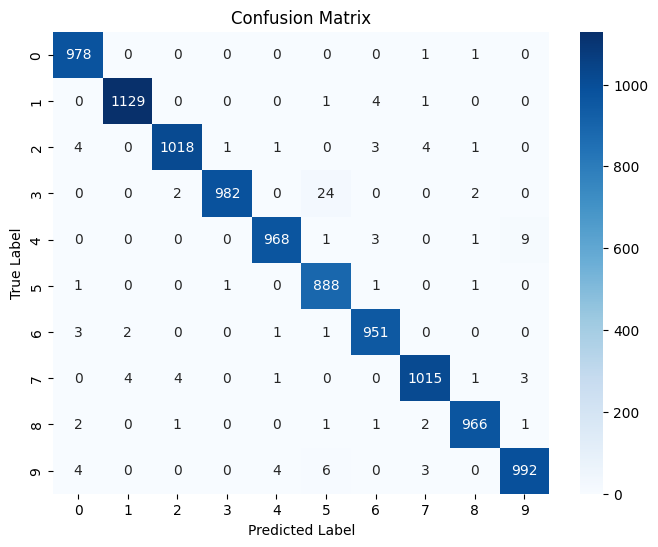

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

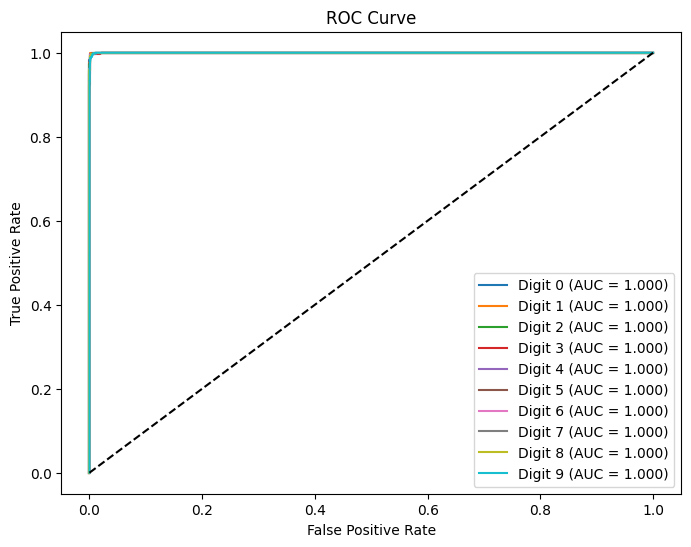

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [35]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [36]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [37]:
x_train, x_val, y_train_cat, y_val_cat, y_train, y_val = train_test_split(
    x_train, y_train_cat, y_train, test_size=0.2, random_state=42
)

In [38]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train_cat, epochs=15, validation_data=(x_val, y_val_cat), batch_size=64)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 167ms/step - accuracy: 0.2710 - loss: 1.9485 - val_accuracy: 0.5284 - val_loss: 1.3030
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 172ms/step - accuracy: 0.5031 - loss: 1.3655 - val_accuracy: 0.6169 - val_loss: 1.0949
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 173ms/step - accuracy: 0.5853 - loss: 1.1653 - val_accuracy: 0.6459 - val_loss: 1.0179
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 170ms/step - accuracy: 0.6370 - loss: 1.0429 - val_accuracy: 0.6850 - val_loss: 0.8910
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 174ms/step - accuracy: 0.6639 - loss: 0.9517 - val_accuracy: 0.7130 - val_loss: 0.8300
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 167ms/step - accuracy: 0.6907 - loss: 0.8754 - val_accuracy: 0.7089 - val_loss: 0.8347
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 167ms/step - accuracy: 0.7156 - loss: 0.8218 - val_accuracy: 0.7277 - val_loss: 0.7877
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 172ms/step - accuracy: 0.7360 -

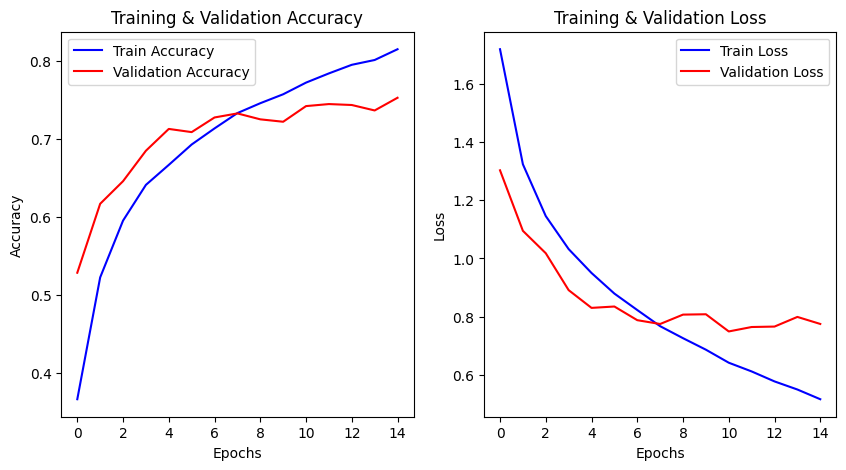

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7510 - loss: 0.7876
Test Accuracy: 0.7476


In [43]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
print(f"Precision: {report['weighted avg']['precision']:.4f}")
print(f"Recall: {report['weighted avg']['recall']:.4f}")
print(f"F1-Score: {report['weighted avg']['f1-score']:.4f}")

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

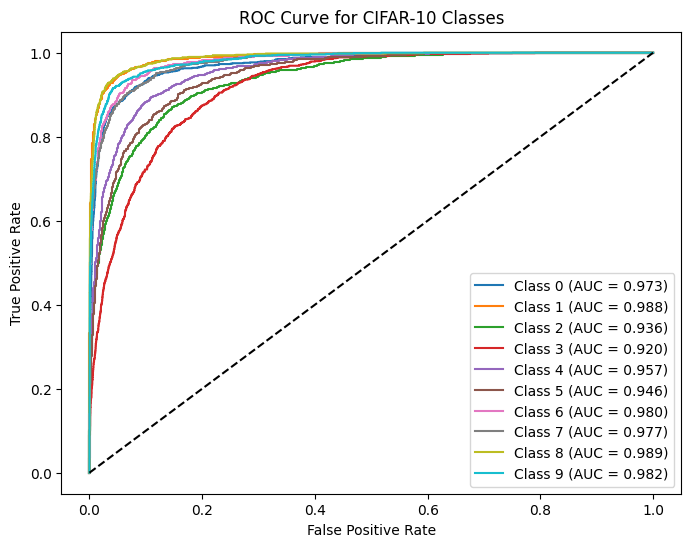

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-10 Classes")
plt.legend()
plt.show()